<a href="https://colab.research.google.com/github/gopal2812/convandgpt/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

In [2]:
!git clone https://github.com/gopal2812/convandgpt.git
import os


Cloning into 'convandgpt'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 134 (delta 63), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (134/134), 399.48 KiB | 9.99 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [3]:
os.chdir("/content/convandgpt/Submission5")
!pwd; ls

/content/convandgpt/Submission5
model.py  README.md  utils.py


In [4]:
from model import Net
from utils import *

In [5]:
device = get_device()
print("Device is: ", device)

Device is:  cpu


In [6]:
train_data, test_data = get_mnist_dataset()
train_loader, test_loader = get_data_loaders(train_data, test_data, batch_size=512)

100%|██████████| 9912422/9912422 [00:00<00:00, 193977181.51it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 87273554.63it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 202118578.39it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15277088.03it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [7]:
model = Net().to(device)

In [8]:
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [9]:
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.4816 Batch_id=117 Accuracy=58.20: 100%|██████████| 118/118 [05:49<00:00,  2.96s/it]


Test set: Average loss: 0.2313, Accuracy: 9269/10000 (92.69%)

Epoch 2


Train: Loss=0.1975 Batch_id=117 Accuracy=93.97: 100%|██████████| 118/118 [05:52<00:00,  2.99s/it]


Test set: Average loss: 0.0962, Accuracy: 9686/10000 (96.86%)

Epoch 3


Train: Loss=0.0419 Batch_id=117 Accuracy=96.44: 100%|██████████| 118/118 [05:46<00:00,  2.94s/it]


Test set: Average loss: 0.0724, Accuracy: 9767/10000 (97.67%)

Epoch 4


Train: Loss=0.0750 Batch_id=117 Accuracy=97.06: 100%|██████████| 118/118 [05:56<00:00,  3.02s/it]


Test set: Average loss: 0.0487, Accuracy: 9836/10000 (98.36%)

Epoch 5


Train: Loss=0.1072 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [05:50<00:00,  2.97s/it]


Test set: Average loss: 0.0404, Accuracy: 9868/10000 (98.68%)

Epoch 6


Train: Loss=0.0333 Batch_id=117 Accuracy=97.84: 100%|██████████| 118/118 [05:48<00:00,  2.95s/it]


Test set: Average loss: 0.0419, Accuracy: 9863/10000 (98.63%)

Epoch 7


Train: Loss=0.0959 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [05:45<00:00,  2.93s/it]


Test set: Average loss: 0.0367, Accuracy: 9889/10000 (98.89%)

Epoch 8


Train: Loss=0.0133 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [05:42<00:00,  2.91s/it]


Test set: Average loss: 0.0302, Accuracy: 9905/10000 (99.05%)

Epoch 9


Train: Loss=0.0696 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [05:35<00:00,  2.84s/it]


Test set: Average loss: 0.0322, Accuracy: 9892/10000 (98.92%)

Epoch 10


Train: Loss=0.0328 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [05:39<00:00,  2.88s/it]


Test set: Average loss: 0.0278, Accuracy: 9909/10000 (99.09%)

Epoch 11


Train: Loss=0.0310 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [05:46<00:00,  2.94s/it]


Test set: Average loss: 0.0300, Accuracy: 9897/10000 (98.97%)

Epoch 12


Train: Loss=0.0957 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [05:29<00:00,  2.80s/it]


Test set: Average loss: 0.0340, Accuracy: 9891/10000 (98.91%)

Epoch 13


Train: Loss=0.0581 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [05:45<00:00,  2.93s/it]


Test set: Average loss: 0.0243, Accuracy: 9917/10000 (99.17%)

Epoch 14


Train: Loss=0.0078 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [05:30<00:00,  2.80s/it]


Test set: Average loss: 0.0253, Accuracy: 9909/10000 (99.09%)

Epoch 15


Train: Loss=0.0279 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [05:53<00:00,  3.00s/it]


Test set: Average loss: 0.0259, Accuracy: 9904/10000 (99.04%)

Epoch 16


Train: Loss=0.0318 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [05:48<00:00,  2.95s/it]


Test set: Average loss: 0.0226, Accuracy: 9910/10000 (99.10%)

Epoch 17


Train: Loss=0.0568 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [05:42<00:00,  2.91s/it]


Test set: Average loss: 0.0223, Accuracy: 9913/10000 (99.13%)

Epoch 18


Train: Loss=0.0041 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [05:45<00:00,  2.93s/it]


Test set: Average loss: 0.0228, Accuracy: 9913/10000 (99.13%)

Epoch 19


Train: Loss=0.0069 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [05:48<00:00,  2.95s/it]


Test set: Average loss: 0.0224, Accuracy: 9915/10000 (99.15%)

Epoch 20


Train: Loss=0.0379 Batch_id=117 Accuracy=99.26: 100%|██████████| 118/118 [05:42<00:00,  2.90s/it]


Test set: Average loss: 0.0221, Accuracy: 9916/10000 (99.16%)



Text(0.5, 1.0, 'Test Accuracy')

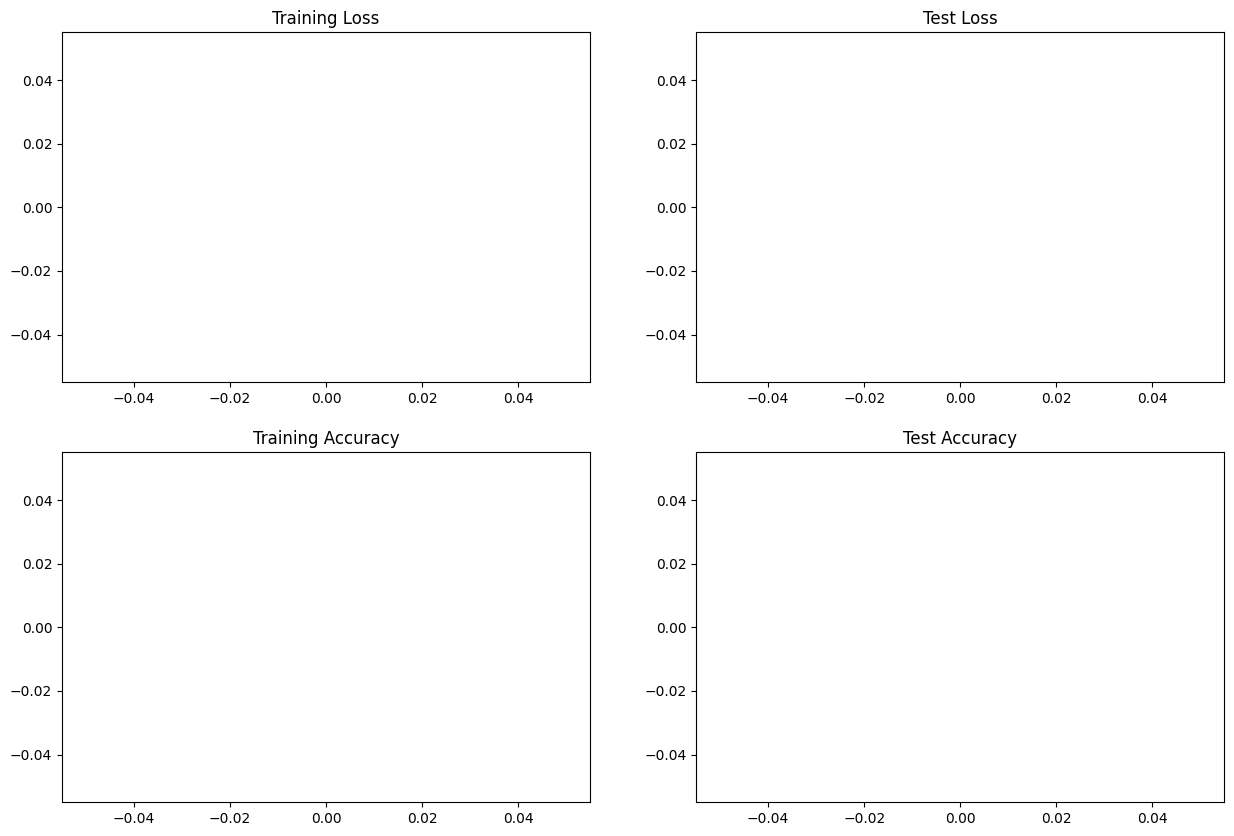

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [12]:
# Plot the accuracy and loss graphs using data and plot_train_test_metrics() from model.py
fig, axs = plot_train_test_metrics()
plt.show()

NameError: name 'plot_train_test_metrics' is not defined